# XAI(Explainable AI)
- 에측의 근거를 설명해 주는 기술
- 이미지를 사용해 이름이나 물건의 종류를 맞히는 모델을 만들었다면, 이미지의 어디를 보고 왜 그런 판단을 했는지 설명해 내는 또 다른 그림을 그려내는 것
    1. CAM(Class Activation Map) : 딥러닝의 중간 과정에서 나온 특징 맵을 이용하여 설명해주는 방법
        - CNN : 신경망 학습을 위해서는 입력된 2D 이미지들을 1차원 배열로 축소해야 하고 차원을 줄이는 과정에서 공간 정보의 손실이 발생할 수밖에 없고, 이를 해소하기 위해 컨볼루션 신경망이 만들어진것
        - 바꾸어 말하면, 컨볼루션 신경망 내부의 레이어들을 하나씩 거쳐 마지막 예측을 위한 단계까지 온 데이터들(이를 중간 맵이라고 함)은 입력 데이터의 속성을 잘 간직하고 있다는 의미임
        1. 이 데이터를 1차원으로 축소시키는 Flatten 단계 직전에 개입해서 그때까지 만들어진 중간 맵들을 따로 모음
        2. 중간 맵들 각각으로부터 평균값(Global Max Pooling, GAP)(중간 맵 안에 들어 있는 모든 값의 평균)을 뽑아냄
        3. 이 평균값과 최종 예측 사이에서 한번 더 학습 진행
        4. 어떤 중간 맵이 최종 결정에 큰 역할을 하는지 알려주는 가중치를 얻음
        5. 가중치를 각 중간 맵에 곱해 중요한 중간 맵은 가중하고 불필요한 중간 맵은 자연스럽게 없애면서 특징 맵을 만들어내는 것
        - 그레디언트 CAM(Gradient CAM) : 같은 원리이지만 평균 값을 계산하기 위해 모델의 구조를 바꾸어야 하는 번거로움을 피하고자 평균값 대신 기울기를 이용하는 방법
    2. 마스크 방식 또는 오클루전(폐쇄성 민감도, Occlusion Sensitivity) : 일부를 가리면서 가려진 부분이 결과에 얼마나 영향을 미치는지 계산하는 방식


# CAM, 오클루전 실습

In [1]:
!pip install tf-explain

     ---------------------------------------- 43.6/43.6 kB ? eta 0:00:00


In [4]:
!pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 36.4 MB/s eta 0:00:00


In [5]:
# GradienCAM, 폐쇄성 민감도 방식 함수(오클루전) 불러오기
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 11s 0us/step


In [ ]:
# GradCAM() : GradientCAM
    # explain() : XAI를 실행하는 함수. 데이터, 모델, 이미지넷의 클래스 번호가 들어감
    # save() : XAI를 실행한 결과, 저장될 폴더, 저장될 이름이 들어감

explainer = GradCAM()  # 그레디언트 CAM 알고리즘 선택
output = explainer.explain(데이터, 모델, 클래스)  # 그레디언트 CAM 실행
explainer.save(output, 저장될 폴더, 저장될 이름)  # 실행 후 저장될 위치와 이름

In [ ]:
# OcclusionSensitivity() : 오클루전
    # explain() : 함수 안의 인자로 패치 크기가 들어감(패치 크기 : 사진을 가리며 움직이는 검은색 사각형의 크기)
    # 패치 크기를 크게 잡으면 조금 더 넓은 범위의 결과가 나오고, 작게 잡으면 조금 더 세밀한 부분을 가리키는 겨로가가 나옴

explainer = OcclusionSensitivity()  # 오클루전 알고리즘 선택
# 패치 크기 설정이 추가됨
output = explainer.explain(데이터, 모델, 클래스, 패치 크기)
explainer.save(output, 저장될 폴더, 저장될 이름)

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오기
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

# 이미지 불러와 보여주는데 쓰는 라이브러리
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 원본 이미지가 들어갈 리스트
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

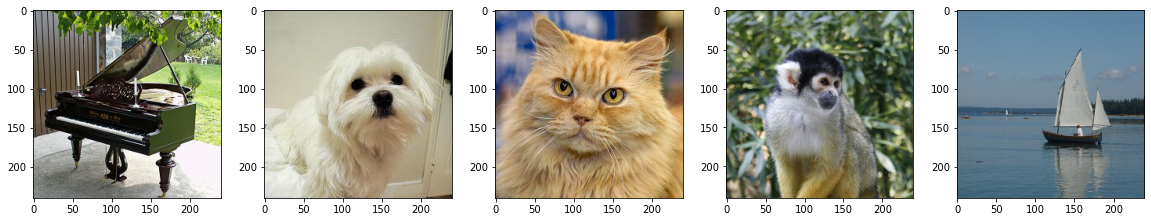

In [8]:
# 이미지 크기 정하고 보여주기
plt.figure(figsize=(20, 20))

for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i+1)
    plt.imshow(image_o)

In [9]:
# 사전에 학습된 딥러닝 모델 불러오기
model = VGG16(weights='imagenet', include_top=True)

# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
input_list = ['maltese', 'persian_cat', 'squirrel_monkey', 'grand_piano', 'yawl']
imagenet_index = ['153', '283', '382', '579', '914']

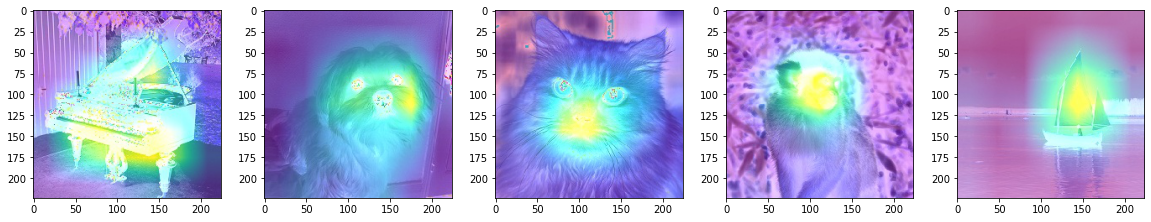

In [16]:
# 그레디언트 CAM 알고리즘 선택
explainer = GradCAM()

# 그레디언트 CAM 알고리즘 적용된 이미지가 들어갈 빈 리스트
images_cams = []

# 그레디언트 CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
    # 이미지를 불러오고 내부에서 처리될 이미지의 크기를 설정
    img = load_img('./data/img/{}_0.jpg' .format(l), target_size=(224,224))
    img = img_to_array(img)  # 이미지를 넘파이 배열로 바꿔줌
    data = ([img], None)
    # 그레디언트 CAM 실행
    grid = explainer.explain(data, model, int(i))
    # 실행 후 저장되는 이름
    explainer.save(grid, '.', './data/img_ny/{}_cam.jpg' .format(l))
    
# 그레디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img_ny/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5,5,i+1)
    plt.imshow(image_c)

5/5 [==============================] - 0s 36ms/step


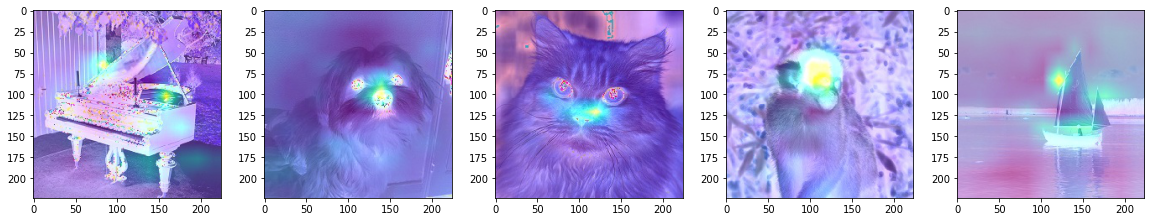

In [18]:
# 오클루전 알고리즘 선택
explainer = OcclusionSensitivity()

# 알고리즘이 적용된 이미지가 들어갈 빈 리스트
images_occls = []

# 패치 크기 설정
patch_size = 20

# 오클루전 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg' .format(l), target_size=(224,224))
    img = img_to_array(img)
    data = ([img], None)
    # 패치 크기 설정 추가
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, '.', './data/img_ny/{}_occl.jpg' .format(l))
    
# 오클루전 알고리즘이 적용된 이미지를 불러오기
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img_ny/*_occl.jpg'):
    images_occls.append(mpimg.imread(img_path))
    
for i, image in enumerate(images_occls):
    plt.subplot(5,5,i+1)
    plt.imshow(image)